In [35]:
## Imports and adapted functions
from fake_data import test_fake_data, make_map

## Parameters
parameters = {
    'PCA_COMPONENTS': 50,

    # Network
    'LEARNING_RATE' : 0.01,
    'EPOCHS'        : 5000,
    'DROPOUT_RATE'  : 0.2,
    'TRAIN_CUTOFF'  : 1700,

    # Subimages
    'SUBIMG_SPACING': 4,
    'IMG_WIDTH'     : 10,
    'N_BCC_LIM'     : 6,

    # Noise
    'BL_AMPLITUDE'  : 50,
    'NOISE_STD'     : 3,

    # Spectral features
    'PEAK_HEIGHTS'  : [30,60],
    'PEAK_WIDTHS'   : [20,10]
}

In [5]:
bcc_map = make_map()

100%|██████████| 5000/5000 [03:15<00:00, 25.54it/s]


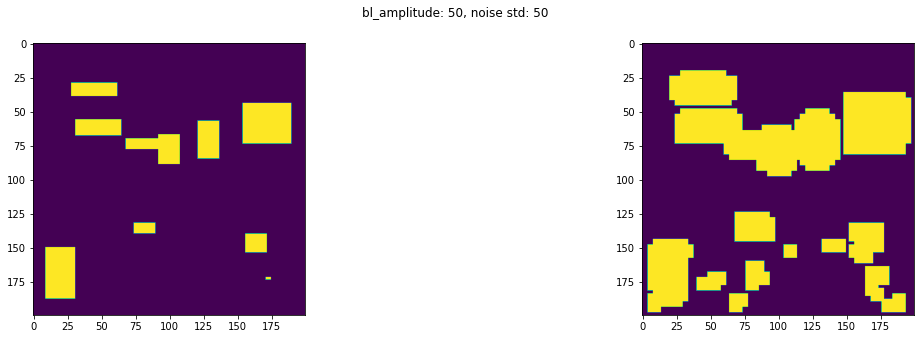

In [54]:
parameters['BL_AMPLITUDE'] = 50
parameters['NOISE_STD']  = 50
test_fake_data(bcc_map, parameters)

Visualise max baseline + noise

Text(0.5, 0, 'Raman shift [a.u.]')

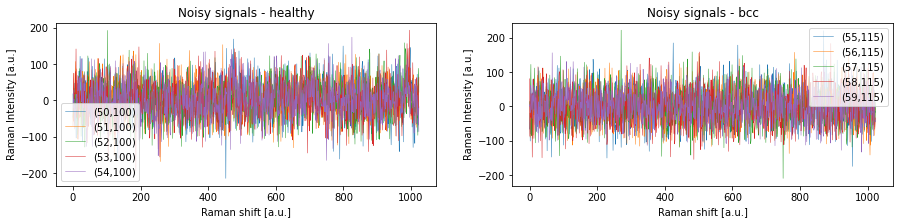

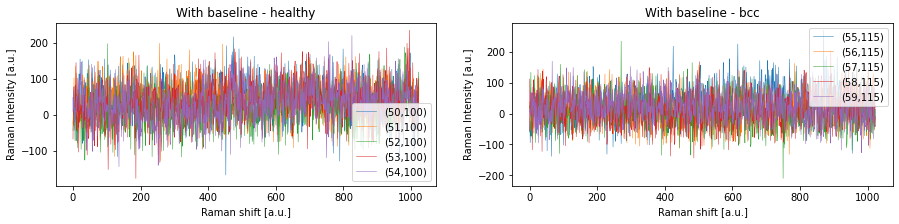

In [56]:
from fake_data import make_peak, add_noise, add_baseline
import numpy as np
import matplotlib.pyplot as plt

parameters['BL_AMPLITUDE'] = 50
parameters['NOISE_STD']  = 50

LEARNING_RATE   = parameters['LEARNING_RATE']
EPOCHS          = parameters['EPOCHS']
DROPOUT_RATE    = parameters['DROPOUT_RATE']
TRAIN_CUTOFF    = parameters['TRAIN_CUTOFF']
SUBIMG_SPACING  = parameters['SUBIMG_SPACING']
IMG_WIDTH       = parameters['IMG_WIDTH']
PCA_COMPONENTS  = parameters['PCA_COMPONENTS']
N_BCC_LIM       = parameters['N_BCC_LIM']
BL_AMPLITUDE    = parameters['BL_AMPLITUDE']
PEAK_HEIGHTS    = parameters['PEAK_HEIGHTS']
PEAK_WIDTHS     = parameters['PEAK_WIDTHS']
NOISE_STD       = parameters['NOISE_STD']

###############################################
## 1. Create "ideal" spectra for healthy vs. BCC
healthy = np.zeros((1024))
bcc     = np.zeros((1024))

for i in range(5): # 5 big peaks
    healthy = make_peak(healthy, PEAK_HEIGHTS[0], PEAK_HEIGHTS[1], PEAK_WIDTHS[0])
    bcc     = make_peak(bcc    , PEAK_HEIGHTS[0], PEAK_HEIGHTS[1], PEAK_WIDTHS[0])
for i in range(10): # 10 small peaks
    healthy = make_peak(healthy, 1, PEAK_HEIGHTS[0], PEAK_WIDTHS[1])
    bcc     = make_peak(bcc    , 1, PEAK_HEIGHTS[0], PEAK_WIDTHS[1])

# Remove negative elements (make_peak can return negative values)
healthy = [0 if i < 0 else i for i in healthy]
bcc     = [0 if i < 0 else i for i in bcc]

###############################################
## 2. Add 0-mean Gaussian noise
mean = 0
img_spectra = add_noise(bcc_map, healthy,bcc,mean,NOISE_STD)

_, axs = plt.subplots(1,2, figsize=(15,3))
axs[0].plot(np.transpose(img_spectra[50:55,90,:]), linewidth=0.5)
axs[0].title.set_text('Noisy signals - healthy')
axs[0].legend(['(50,100)','(51,100)','(52,100)','(53,100)','(54,100)'])
axs[0].set_ylabel('Raman Intensity [a.u.]')
axs[0].set_xlabel('Raman shift [a.u.]')

axs[1].plot(np.transpose(img_spectra[70:75,90,:]), linewidth=0.5)
axs[1].title.set_text('Noisy signals - bcc')
axs[1].legend(['(55,115)','(56,115)','(57,115)','(58,115)','(59,115)'])
axs[1].set_ylabel('Raman Intensity [a.u.]')
axs[1].set_xlabel('Raman shift [a.u.]')

###############################################
## 3. Add and remove baseline
for i in range(45,80):
    for j in range(88,92):
        img_spectra[i,j]     = add_baseline(img_spectra[i,j],BL_AMPLITUDE)

_, axs = plt.subplots(1,2, figsize=(15,3))
axs[0].plot(np.transpose(img_spectra[50:55,90,:]), linewidth=0.5)
axs[0].title.set_text('With baseline - healthy')
axs[0].legend(['(50,100)','(51,100)','(52,100)','(53,100)','(54,100)'])
axs[0].set_ylabel('Raman Intensity [a.u.]')
axs[0].set_xlabel('Raman shift [a.u.]')

axs[1].plot(np.transpose(img_spectra[70:75,90,:]), linewidth=0.5)
axs[1].title.set_text('With baseline - bcc')
axs[1].legend(['(55,115)','(56,115)','(57,115)','(58,115)','(59,115)'])
axs[1].set_ylabel('Raman Intensity [a.u.]')
axs[1].set_xlabel('Raman shift [a.u.]')